In [20]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [21]:
df_reviews = pd.read_csv('BA820/reviews.csv')
df_reviews.drop(['id','reviewer_name'], axis=1, inplace=True)
df_reviews.rename(columns={'date': 'review_date'}, inplace=True)
df_reviews

,listing_id,review_date,reviewer_id,comments
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,2015-10-30,15151513,Great value for the money! This location has e...
...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...


In [22]:
df_list=pd.read_csv('BA820/listings.csv')

In [23]:
df_list['host_acceptance_rate']

0        29%
1       100%
2       100%
3        50%
4        46%
        ... 
4199     98%
4200     98%
4201    100%
4202     98%
4203     99%
Name: host_acceptance_rate, Length: 4204, dtype: object

In [24]:
columns_to_keep= [
    'id','neighbourhood_cleansed','price', 'latitude', 'longitude', 
    'room_type', 'number_of_reviews','review_scores_rating']
df_list1= df_list[columns_to_keep]
df_list1 = df_list1.drop_duplicates()
df_list1.rename(columns={'id': 'listing_id'}, inplace=True)
df_list1

,listing_id,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
1,5506,Roxbury,$135.00,42.328440,-71.095810,Entire home/apt,122,4.79
2,6695,Roxbury,$179.00,42.328020,-71.093870,Entire home/apt,127,4.81
3,8789,Beacon Hill,$91.00,42.358670,-71.063070,Entire home/apt,27,4.67
4,10813,Back Bay,$86.00,42.350610,-71.087870,Entire home/apt,5,5.00
...,...,...,...,...,...,...,...,...
4199,1046563598019556549,Dorchester,$83.00,42.285236,-71.069907,Entire home/apt,1,5.00
4200,1046568292864752336,Downtown,$107.00,42.352970,-71.063690,Entire home/apt,0,NaN
4201,1047166785349446101,Fenway,$136.00,42.347480,-71.090780,Entire home/apt,0,NaN
4202,1047226383263246733,Dorchester,$83.00,42.285161,-71.067922,Entire home/apt,0,NaN


In [25]:
df_price= pd.read_csv('BA820/calendar.csv')
df_price = df_price.drop_duplicates()
columns_to_keep= [
    'listing_id','price']
df_price1= df_price[columns_to_keep]
df_price1.nunique()

listing_id    4204
price          461
dtype: int64

In [26]:
df = pd.merge(df_reviews, df_list1, on='listing_id', how='left')
df

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
4,3781,2015-10-30,15151513,Great value for the money! This location has e...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,$110.00,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,$140.00,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50


In [27]:
df.isna().sum()

listing_id                   0
review_date                  0
reviewer_id                  0
comments                    52
neighbourhood_cleansed       0
price                     7901
latitude                     0
longitude                    0
room_type                    0
number_of_reviews            0
review_scores_rating         0
dtype: int64

In [28]:
data = df.dropna(subset=['comments'])
data

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
4,3781,2015-10-30,15151513,Great value for the money! This location has e...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,$110.00,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,$140.00,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50


In [29]:

data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [30]:
price_means = data.groupby(['room_type'])['price'].transform('mean')
data['price'] = data['price'].fillna(price_means)

In [31]:
data['review_date'] = pd.to_datetime(df['review_date'])
data= data[data['review_date'].dt.year.between(2019, 2023)]

In [32]:
data

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
14,3781,2019-02-22,83031353,My partner and I stayed at Frank's apartment f...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
15,3781,2019-12-21,3918963,I liked very much this apartment rented by Fra...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
16,3781,2020-09-03,344701185,I stayed at Frank's apartment for three months...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
17,3781,2020-12-20,348888007,Wonderful 1 bedroom with a great location! The...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
18,3781,2021-02-26,345613836,Great place - amazing location. Highly recom...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,110.0,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,140.0,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,144.0,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,144.0,42.325558,-71.073339,Entire home/apt,2,4.50


In [33]:
corr = data.corr()
corr

,listing_id,reviewer_id,price,latitude,longitude,number_of_reviews,review_scores_rating
listing_id,1.000000,0.116905,0.016125,-0.043077,-0.003945,-0.330101,-0.048088
reviewer_id,0.116905,1.000000,-0.046403,-0.037376,0.012029,-0.054660,-0.058027
price,0.016125,-0.046403,1.000000,0.029094,0.013210,-0.162282,0.098029
latitude,-0.043077,-0.037376,0.029094,1.000000,0.425890,0.252399,-0.123030
longitude,-0.003945,0.012029,0.013210,0.425890,1.000000,0.256565,-0.094537
number_of_reviews,-0.330101,-0.054660,-0.162282,0.252399,0.256565,1.000000,0.190047
review_scores_rating,-0.048088,-0.058027,0.098029,-0.123030,-0.094537,0.190047,1.000000


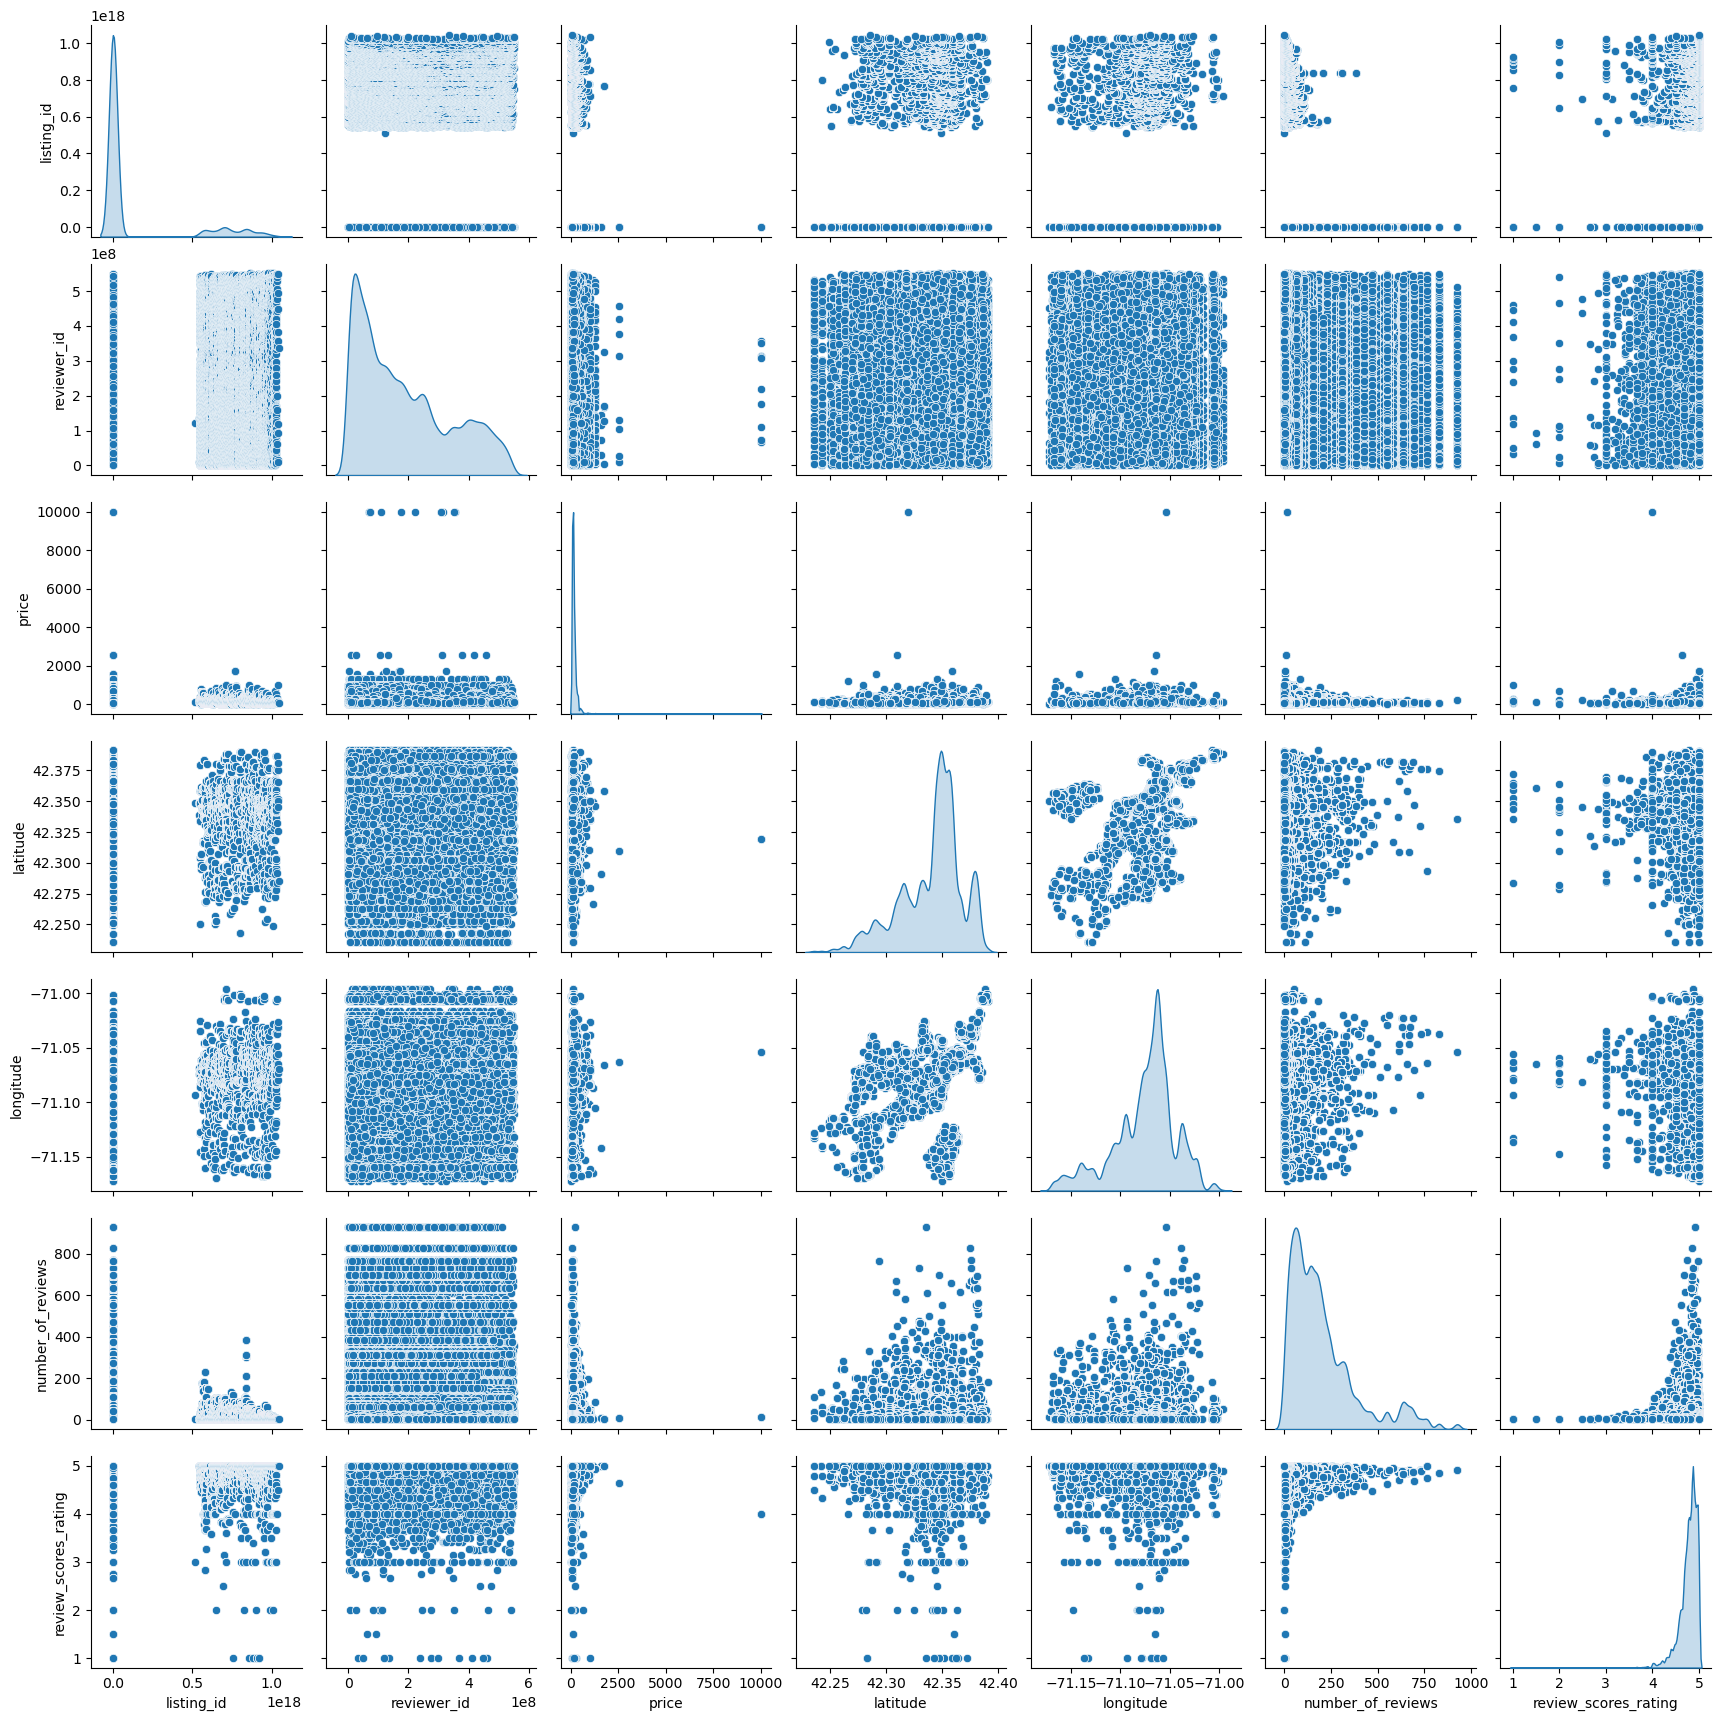

In [36]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [16]:
comments_per_year = data['review_date'].dt.year.value_counts().sort_index()
print(comments_per_year)

2019    23636
2020     9682
2021    20951
2022    36579
2023    45534
Name: review_date, dtype: int64


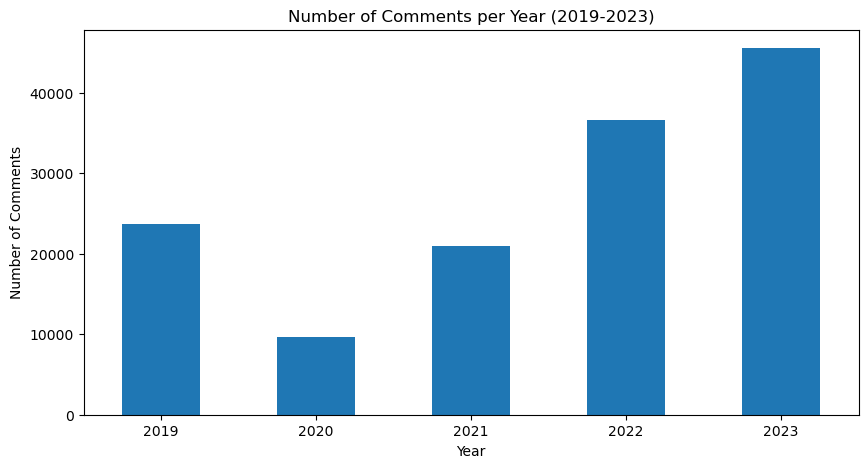

In [17]:
plt.figure(figsize=(10, 5))
comments_per_year.plot(kind='bar')
plt.title('Number of Comments per Year (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()


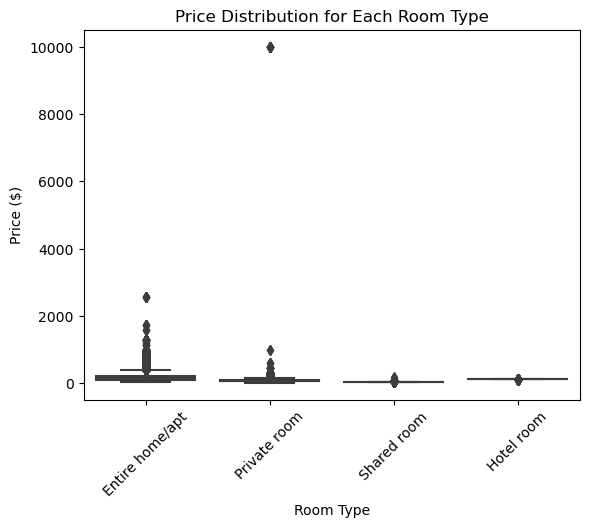

In [39]:
sns.boxplot(data=data, x='room_type', y='price')
plt.title('Price Distribution for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()